In [1]:
#PSI - Projekt

In [2]:
#Dataset - https://www.kaggle.com/datasets/zaurbegiev/my-dataset?resource=download&select=credit_train.csv

In [3]:
# Rafał Kowalczyk

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
data =  pd.read_csv(os.path.join("credit_train.csv"))
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [7]:
# Sprawdzenie czy są nulle

In [8]:
plt.figure(figsize=(9,3),dpi=150)
nullValuesCount = data.isnull().sum().sort_values(ascending=False)

percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)

print(nullValuesCount)
print(missing_value_df)

Months since last delinquent    53655
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Bankruptcies                      718
Tax Liens                         524
Maximum Open Credit               516
Years of Credit History           514
Current Credit Balance            514
Number of Credit Problems         514
Number of Open Accounts           514
Loan ID                           514
Monthly Debt                      514
Customer ID                       514
Home Ownership                    514
Term                              514
Current Loan Amount               514
Loan Status                       514
Purpose                           514
dtype: int64
                              percent_missing
Months since last delinquent        53.380624
Credit Score                        19.567423
Annual Income                       19.567423
Years in current job                 4.711781
Bankruptcies                       

<Figure size 1350x450 with 0 Axes>

In [9]:
#Wyrzucenie kolumn z dużą ilością nulli

In [10]:
data.drop(['Months since last delinquent'], axis=1, inplace=True)

In [11]:
#Wyrzucenie kolumn Customer ID oraz Loan ID, ponieważ odpowiadają one tylko za identyfikację pojedynczego rekordu w tabeli

In [12]:
data.drop(['Customer ID','Loan ID'], axis=1, inplace=True)

In [13]:
data.isnull().sum().sort_values(ascending=False)

Credit Score                 19668
Annual Income                19668
Years in current job          4736
Bankruptcies                   718
Tax Liens                      524
Maximum Open Credit            516
Loan Status                    514
Current Loan Amount            514
Term                           514
Home Ownership                 514
Purpose                        514
Monthly Debt                   514
Years of Credit History        514
Number of Open Accounts        514
Number of Credit Problems      514
Current Credit Balance         514
dtype: int64

In [14]:
data[data['Current Credit Balance'].isnull() == True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Porzucenie wierszy gdzie wszystkie kolumny są nullami
data.dropna(how='all', inplace=True)

In [16]:
data.isnull().sum().sort_values(ascending=False)

Credit Score                 19154
Annual Income                19154
Years in current job          4222
Bankruptcies                   204
Tax Liens                       10
Maximum Open Credit              2
Loan Status                      0
Current Loan Amount              0
Term                             0
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
dtype: int64

In [17]:
#Wizualizacja danych

In [18]:
#Wypisanie unikalnych wartości każdej kolumny

In [19]:
for column_name in data.columns:
  print('--{}--'.format(column_name))
  print(data[column_name].unique(), '\n\n')

--Loan Status--
['Fully Paid' 'Charged Off'] 


--Current Loan Amount--
[  445412.   262328. 99999999. ...   486046.   100254.   274076.] 


--Term--
['Short Term' 'Long Term'] 


--Credit Score--
[ 709.   nan  741.  721. 7290.  730.  678.  739.  728.  740.  743.  727.
  723.  747.  687.  750.  714.  724.  704.  688.  749.  746.  737.  729.
  733.  725.  745.  720.  718.  682. 7120.  680.  710.  598.  719. 6610.
  652.  736. 7380.  644.  672. 7370.  699.  751.  694.  675.  657.  748.
  666.  734.  742.  705.  731. 6240.  712.  685.  717.  722.  618.  676.
  692. 7210.  732.  649.  695.  744.  686.  637.  697.  706.  715.  707.
  726.  738. 7500.  716. 7020.  651.  708.  698.  689.  735.  703.  693.
 7080.  645.  691.  673.  700. 7140.  658.  674.  654. 7490.  681.  696.
  713.  668. 7360.  659. 7160.  647.  683.  670.  623.  711.  639.  671.
 6990.  614.  667.  701. 7410. 7310. 7040. 7060.  615. 7200.  656.  653.
  664.  613. 7450. 7300.  636.  702. 7430.  594. 7170.  646. 7000.  669.


In [20]:
#Możemy zauważyć, że kolumna ,,Purpose" posiada dwie wartości do określenia tej samej wartości, zatem należy ujednolicić tą wartość
data.Purpose = data.Purpose.str.replace('other','Other')

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64


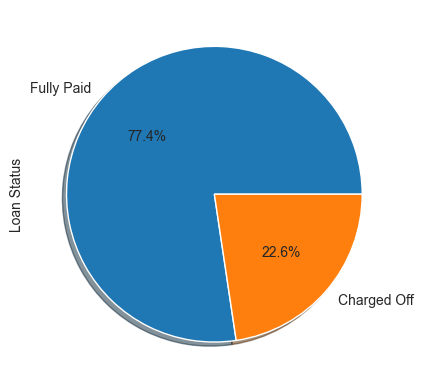

In [21]:
data['Loan Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
print(data['Loan Status'].value_counts())

Short Term    72208
Long Term     27792
Name: Term, dtype: int64


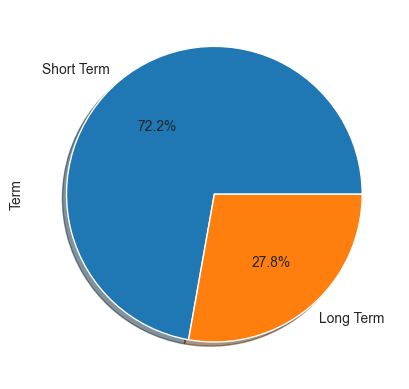

In [22]:
data['Term'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
print(data['Term'].value_counts())

<Axes: xlabel='Term', ylabel='count'>

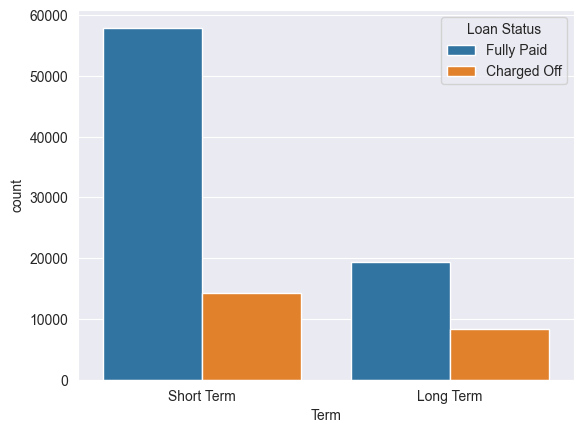

In [23]:
sns.countplot(x= data['Term'], hue=data['Loan Status'])

<Axes: xlabel='Years in current job', ylabel='count'>

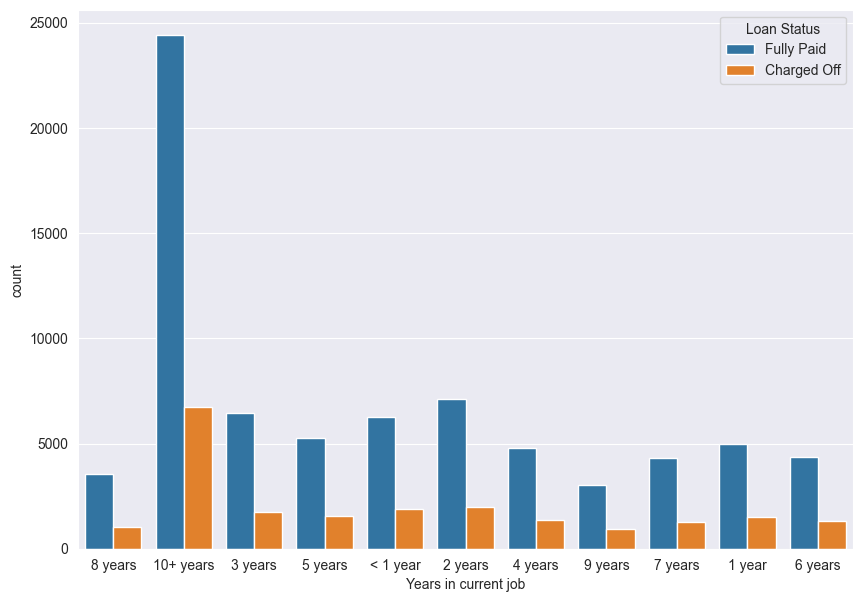

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(x= data['Years in current job'], hue=data['Loan Status'])

Text(0.5, 1.0, 'Purpose of taking Loan')

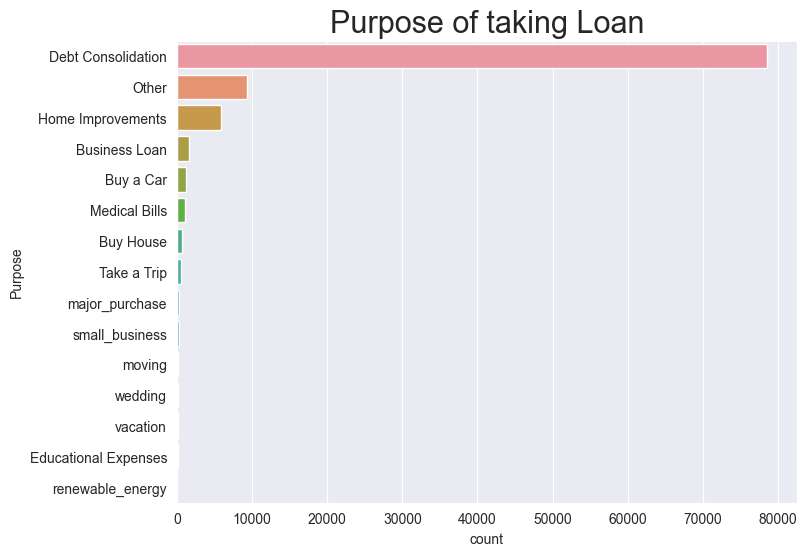

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(y='Purpose', data=data, order = data['Purpose'].value_counts().index)
plt.title('Purpose of taking Loan' , fontdict={'fontsize':22})

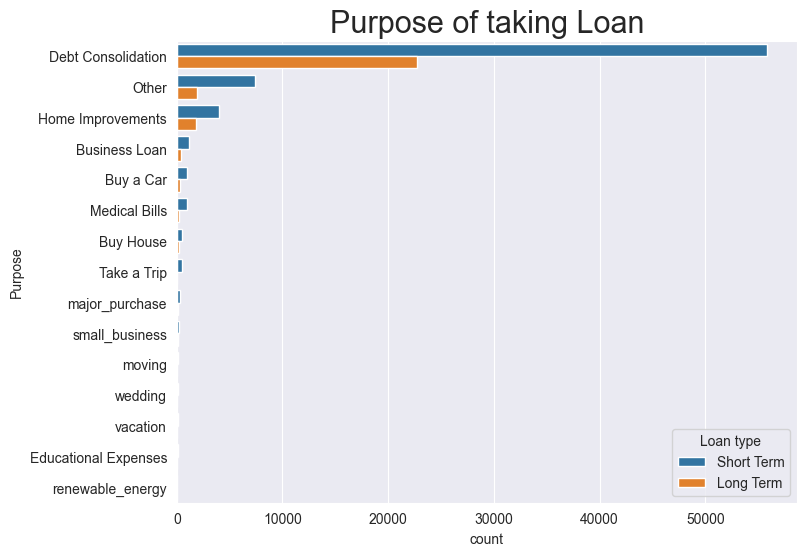

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(y='Purpose', data=data, order = data['Purpose'].value_counts().index, hue='Term')
plt.title('Purpose of taking Loan' , fontdict={'fontsize':22})
plt.legend(title="Loan type", loc="lower right");

<Axes: xlabel='Home Ownership', ylabel='count'>

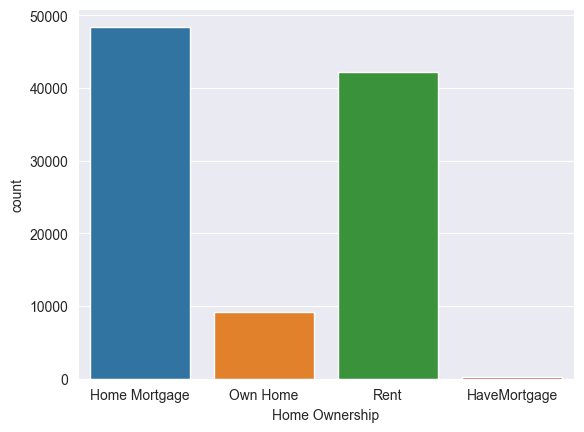

In [27]:
sns.countplot(x=data['Home Ownership'])

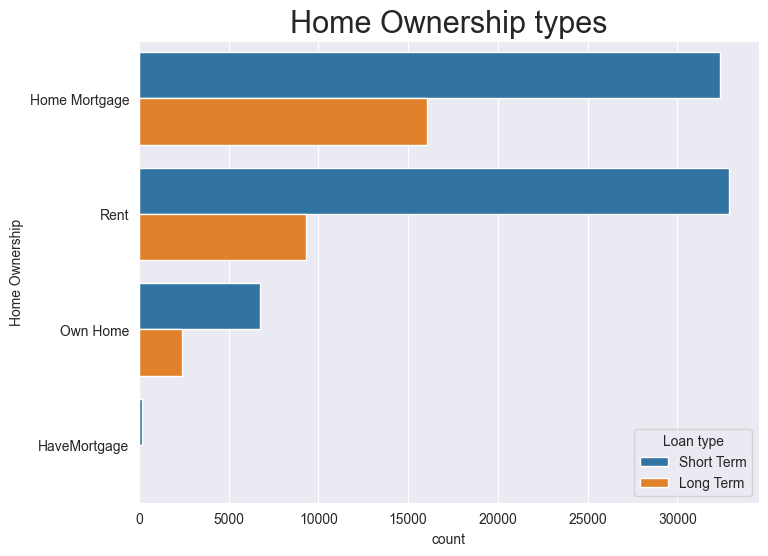

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(y='Home Ownership' , data=data, order = data['Home Ownership'].value_counts().index, hue='Term')
plt.title('Home Ownership types', fontdict={'fontsize':22})
plt.legend(title="Loan type", loc="lower right");

<Axes: xlabel='Number of Open Accounts', ylabel='count'>

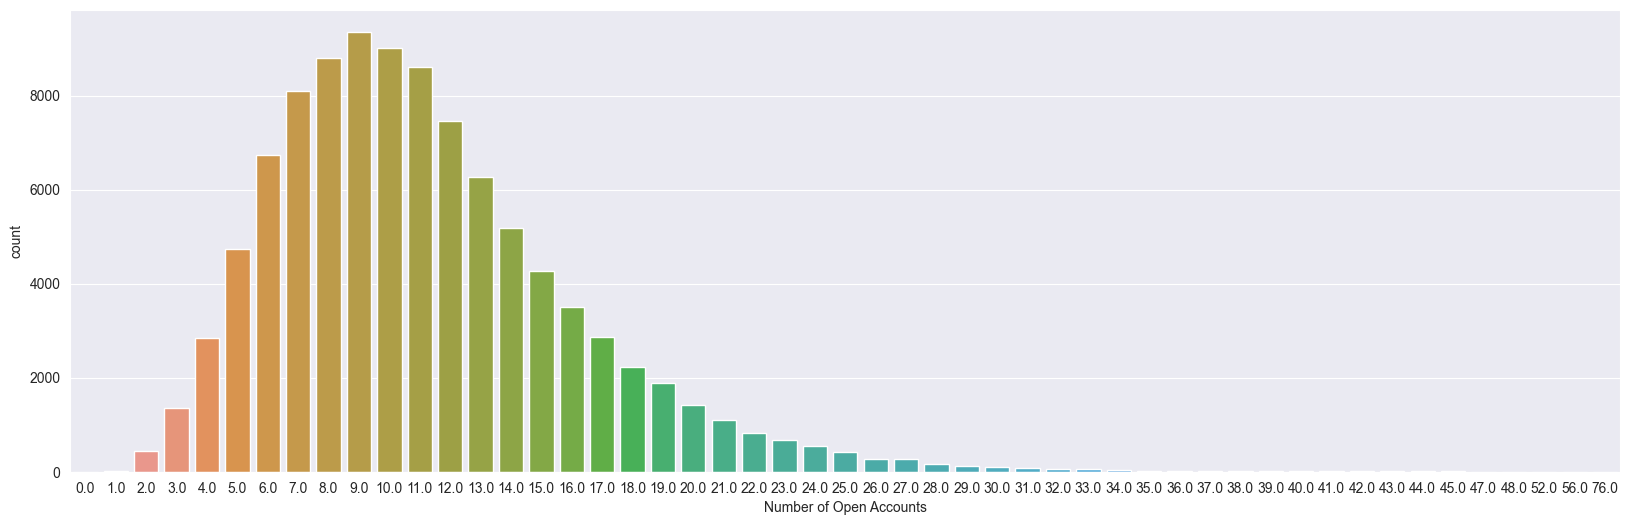

In [29]:
plt.figure(figsize=(20,6))
sns.countplot(x=data['Number of Open Accounts'])

<Axes: xlabel='Number of Credit Problems', ylabel='count'>

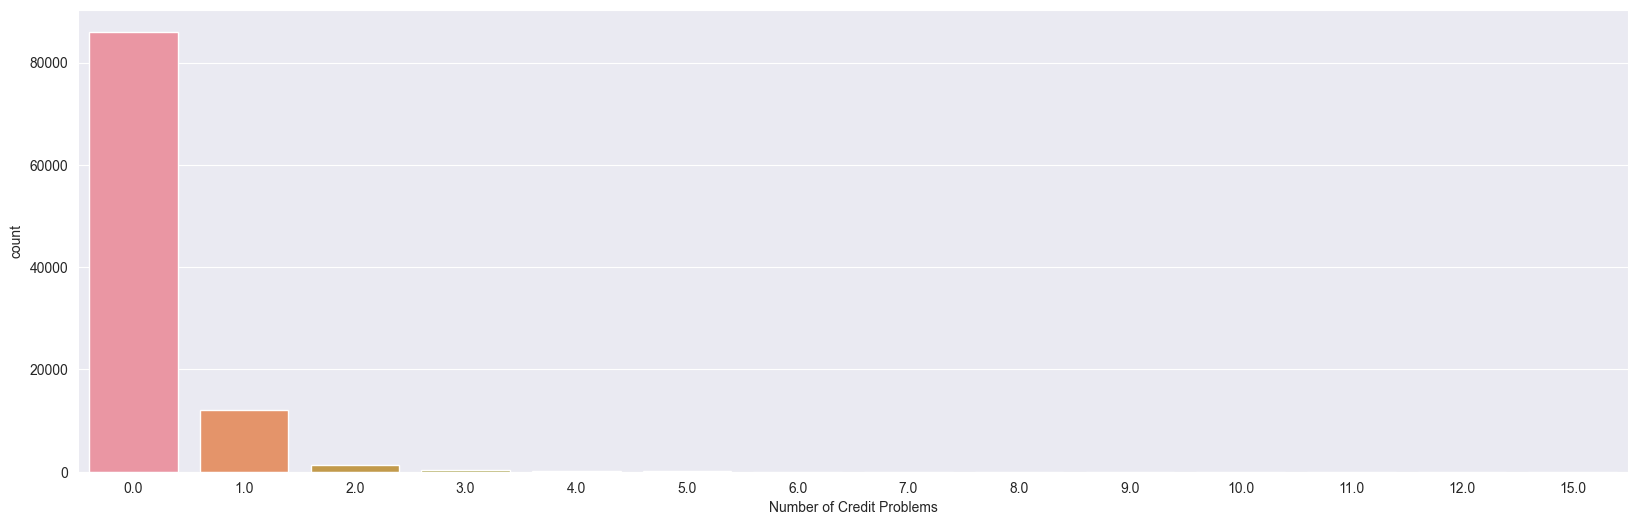

In [30]:
plt.figure(figsize=(20,6))
sns.countplot(x=data['Number of Credit Problems'])

<Axes: xlabel='Bankruptcies', ylabel='count'>

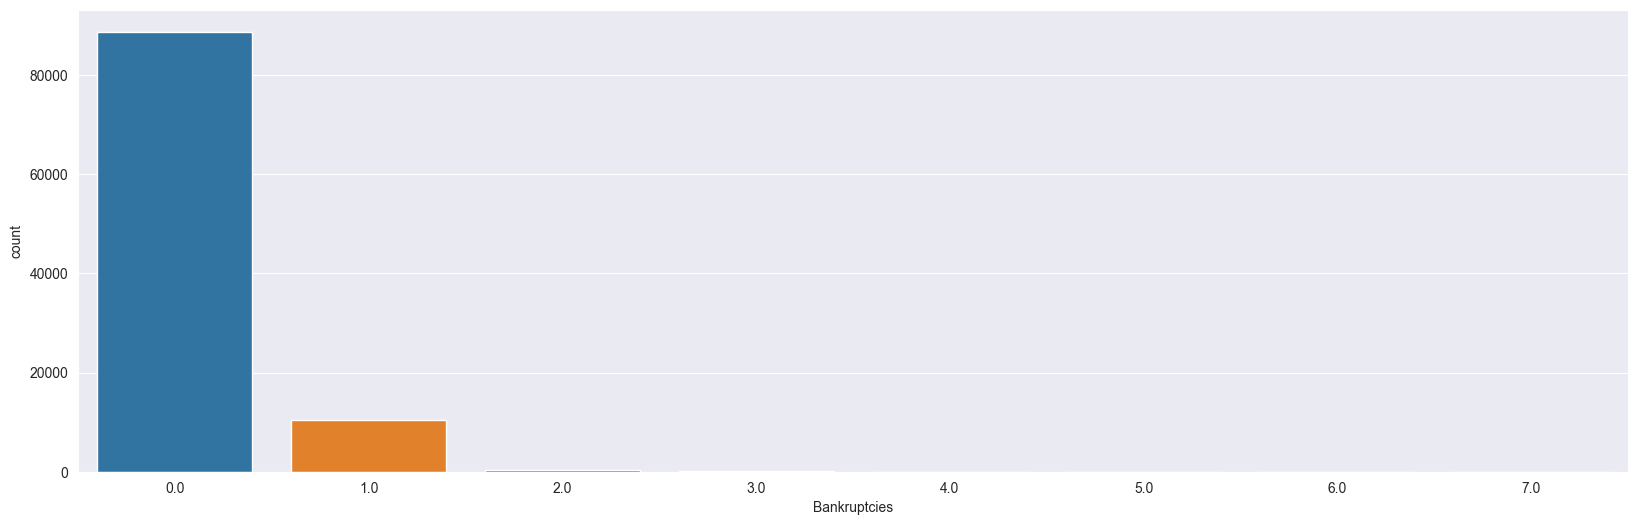

In [31]:
plt.figure(figsize=(20,6))
sns.countplot(x=data['Bankruptcies'])

C:\Users\Rafal\AppData\Local\Temp\ipykernel_12164\438318028.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True)


<Axes: >

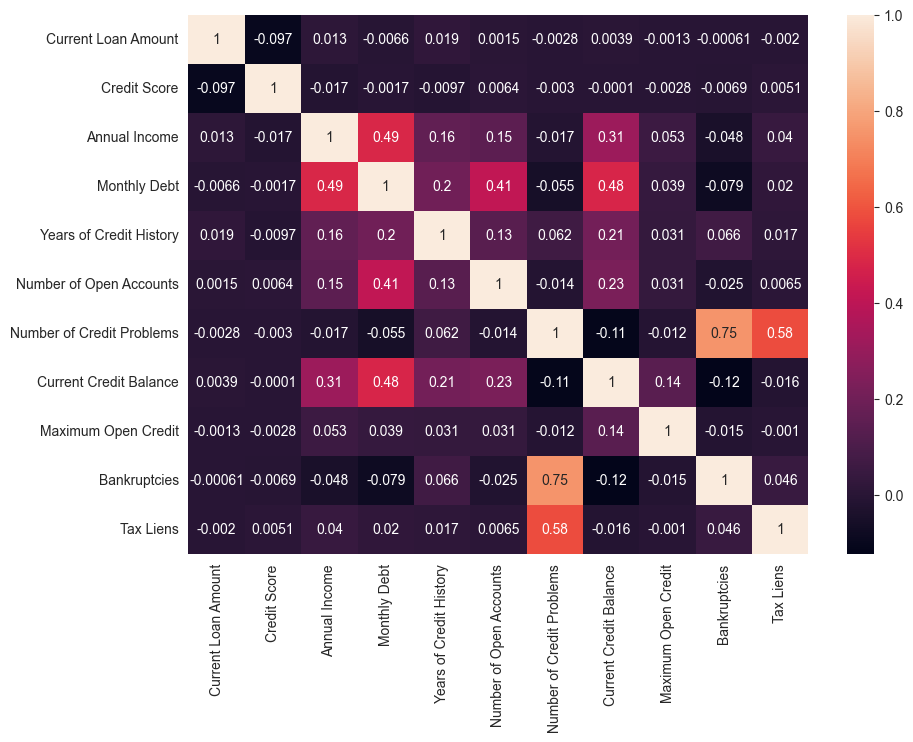

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot= True)

In [33]:
data.corr()

C:\Users\Rafal\AppData\Local\Temp\ipykernel_12164\1185648202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029
Bankruptcies,-0.000608,-0.006935,-0.047672,-0.078979,0.066247,-0.024575,0.752942,-0.122603,-0.014574,1.000000,0.046110


In [34]:
#Obserwacje
#Możemy zauważyć, że:
# - bankructwa mają duże powiązanie z liczbą problemów z kredytami,
# - miesięczne zadłużenie ma duże powiązanie z bieżącym saldem kredytowym, rocznym dochodem oraz liczbą otwartych kont bankowych,
# - zastawy podatkowe mają dużą korelację z liczbą problemów z kredytami,

In [35]:
#Modelowanie

In [36]:
X = data.drop(['Loan Status'], axis=1)
y = data['Loan Status'].values
print(np.unique(y))

y[ y == 'Charged Off'] = 0
y[ y == 'Fully Paid'] = 1

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

['Charged Off' 'Fully Paid']


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 15)
(20000, 15)
(80000,)
(20000,)


In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [40]:
#Pipeline dla danych numerycznych

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Current Loan Amount", "Credit Score", "Annual Income", "Monthly Debt", "Years of Credit History", "Number of Open Accounts", "Number of Credit Problems", "Current Credit Balance", "Maximum Open Credit", "Bankruptcies", "Tax Liens"])),
        ("imputer", SimpleImputer(strategy="median")),
        ('standardscaler', StandardScaler()),
    ])

In [42]:
#Pipeline dla danych kategorycznych

In [43]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Term", "Years in current job", "Home Ownership", "Purpose"])),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
        ("standardscaler", StandardScaler())
    ])

In [44]:
#Polaczenie pipelinow

In [45]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [46]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [47]:
#modele

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe1 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', LogisticRegression())])

param_grid1 = {
            'classifier__C' : [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

grid_1 = GridSearchCV(pipe1, param_grid1, cv=kfold, return_train_score=True, n_jobs=-1)
grid_1.fit(X_train, y_train)
print(grid_1.best_params_)
print(grid_1.best_score_)

{'classifier__C': 0.001}
0.819


In [55]:
from sklearn.ensemble import RandomForestClassifier

pipe2 = Pipeline([
     ('preprocessing', preprocess_pipeline),
     ('classifier', RandomForestClassifier())])

param_grid2 = {
            'classifier__n_estimators': [5, 10, 50, 100],
            'classifier__max_leaf_nodes': [5, 20, 50, 100, 1000],
            'classifier__max_depth': [5, 10, 20, 50, 100]
}

grid_2 = GridSearchCV(pipe2, param_grid2, cv=kfold, return_train_score=True, n_jobs=-1)

grid_2.fit(X_train, y_train)
print(grid_2.best_params_)
print(grid_2.best_score_)

{'classifier__max_depth': 100, 'classifier__max_leaf_nodes': 1000, 'classifier__n_estimators': 50}
0.8193625000000001


In [56]:
from sklearn.neighbors import KNeighborsClassifier

pipe3 = Pipeline([
     ('preprocessing', preprocess_pipeline),
     ('classifier', KNeighborsClassifier())])

param_grid3 = {
            'classifier__n_neighbors' : [2, 7, 10, 100],
           'classifier__weights' : ['uniform','distance'],
           'classifier__metric' : ['minkowski','euclidean','manhattan']
}

grid_3 = GridSearchCV(pipe3, param_grid3, cv=kfold, return_train_score=True, n_jobs=-1)

grid_3.fit(X_train, y_train)
print(grid_3.best_params_)
print(grid_3.best_score_)

{'classifier__metric': 'minkowski', 'classifier__n_neighbors': 100, 'classifier__weights': 'distance'}
0.8157375


In [54]:
#SVM poly kernel
from sklearn.svm import SVC

pipe4 = Pipeline([
     ('preprocessing', preprocess_pipeline),
     ('classifier', SVC(kernel='poly', max_iter = 5000))])

param_grid4 = {
            'classifier__C': [0.01, 0.1 ,1, 10],
            'classifier__gamma': [0.01, 0.1, 1, 10],
}

grid_4 = GridSearchCV(pipe4, param_grid4, cv=kfold, return_train_score=True, n_jobs=-1)

grid_4.fit(X_train, y_train)
print(grid_4.best_params_)
print(grid_4.best_score_)

{'classifier__C': 0.01, 'classifier__gamma': 0.01}
0.773575


C:\Users\Rafal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [53]:
#SVM rbf kernel
from sklearn.svm import SVC

pipe5 = Pipeline([
     ('preprocessing', preprocess_pipeline),
     ('classifier', SVC(kernel='rbf', max_iter = 5000))])

param_grid5 = {
            'classifier__C': [0.01, 0.1 ,1, 10],
            'classifier__gamma': [0.01, 0.1, 1, 10],
}

grid_5 = GridSearchCV(pipe5, param_grid5, cv=kfold, return_train_score=True, n_jobs=-1)

grid_5.fit(X_train, y_train)
print(grid_5.best_params_)
print(grid_5.best_score_)

{'classifier__C': 10, 'classifier__gamma': 1}
0.7578875


C:\Users\Rafal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [49]:
#DecisonTree Classifier
from sklearn.tree import DecisionTreeClassifier

pipe6 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', DecisionTreeClassifier())
    ])

param_grid6 = {
            'classifier__max_depth': [1, 10, 50],
            'classifier__max_leaf_nodes': [None, 10, 50, 100, 200],
}

grid_6 = GridSearchCV(pipe6, param_grid6, cv=kfold, return_train_score=True, n_jobs=-1)

grid_6.fit(X_train, y_train)
print(grid_6.best_params_)
print(grid_6.best_score_)

{'classifier__max_depth': 1, 'classifier__max_leaf_nodes': None}
0.818875


In [50]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

pipe7 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', AdaBoostClassifier())
    ])

param_grid7 = {
            'classifier__n_estimators' : [2, 10, 100, 400, 700],
            'classifier__learning_rate' : [0.01, 0.1, 0.4, 0.8, 1]
}

grid_7 = GridSearchCV(pipe7, param_grid7, cv=kfold, return_train_score=True, n_jobs=-1)

grid_7.fit(X_train, y_train)
print(grid_7.best_params_)
print(grid_7.best_score_)

{'classifier__learning_rate': 1, 'classifier__n_estimators': 100}
0.8191


In [51]:
#GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

pipe8 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', GradientBoostingClassifier())
    ])

param_grid8 = {
            'classifier__n_estimators' : [2, 10, 100, 400, 700],
            'classifier__learning_rate' : [0.01, 0.1, 0.4, 0.8, 1]
}

grid_8 = GridSearchCV(pipe8, param_grid8, cv=kfold, return_train_score=True, n_jobs=-1)

grid_8.fit(X_train, y_train)
print(grid_8.best_params_)
print(grid_8.best_score_)

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 400}
0.8195499999999999


In [52]:
#XGB Classifier
import xgboost

pipe9 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', xgboost.XGBClassifier())
    ])

param_grid9 = {
            'classifier__n_estimators' : [2, 10, 100, 400, 700],
            'classifier__learning_rate' : [0.01, 0.1, 0.4, 0.8, 1]
}

grid_9 = GridSearchCV(pipe9, param_grid9, cv=kfold, return_train_score=True, n_jobs=-1)

grid_9.fit(X_train, y_train)
print(grid_9.best_params_)
print(grid_9.best_score_)

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
0.8196


In [57]:
#Sieci Neuronowe
import tensorflow as tf
from tensorflow import keras

from keras.callbacks import EarlyStopping
from keras.layers import Dense, BatchNormalization, Dropout, Activation
from keras.models import Sequential
from scikeras.wrappers import KerasClassifier

In [59]:
keras.backend.clear_session()

model1 = Sequential()
model1.add(Dense(120, activation="sigmoid", input_shape=(43, )))
model1.add(Dense(80, activation="relu"))
model1.add(Dense(60, activation="relu"))
model1.add(Dense(50, activation="relu"))
model1.add(Dense(35, activation="relu"))
model1.add(Dense(10, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))
model1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

pipeline1 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', KerasClassifier(model=model1, epochs=100, batch_size=16, verbose=1, callbacks = [EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)]))
])

pipeline1.fit(X_train, y_train, classifier__validation_split=0.1)

Epoch 1/100
4500/4500 [==============================] - 8s 2ms/step - loss: 0.4386 - accuracy: 0.8164 - val_loss: 0.4308 - val_accuracy: 0.8239
Epoch 2/100
4500/4500 [==============================] - 7s 1ms/step - loss: 0.4312 - accuracy: 0.8181 - val_loss: 0.4214 - val_accuracy: 0.8236
Epoch 3/100
4500/4500 [==============================] - 7s 1ms/step - loss: 0.4300 - accuracy: 0.8182 - val_loss: 0.4226 - val_accuracy: 0.8239
Epoch 4/100
4500/4500 [==============================] - 7s 1ms/step - loss: 0.4292 - accuracy: 0.8183 - val_loss: 0.4209 - val_accuracy: 0.8239
Epoch 5/100
4500/4500 [==============================] - 7s 2ms/step - loss: 0.4288 - accuracy: 0.8184 - val_loss: 0.4211 - val_accuracy: 0.8240
Epoch 6/100
4500/4500 [==============================] - 7s 2ms/step - loss: 0.4286 - accuracy: 0.8185 - val_loss: 0.4216 - val_accuracy: 0.8236
Epoch 7/100
4500/4500 [==============================] - 7s 2ms/step - loss: 0.4280 - accuracy: 0.8186 - val_loss: 0.4210 - val_ac

Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('num_pipeline',
                                                 Pipeline(steps=[('select_numeric',
                                                                  DataFrameSelector(attribute_names=['Current '
                                                                                                     'Loan '
                                                                                                     'Amount',
                                                                                                     'Credit '
                                                                                                     'Score',
                                                                                                     'Annual '
                                                                                                     'Income',
                                                                                                     'Monthly '
                                                                                                     'Debt',
                                                                                                     'Years '
                                                                                                     'of '
                                                                                                     'Credit '
                                                                                                     'History',
                                                                                                     'Number '
                                                                                                     'of '
                                                                                                     'Open '
                                                                                                     'Accounts',
                                                                                                     'Number '
                                                                                                     'of '
                                                                                                     'Credit '
                                                                                                     'Problems',
                                                                                                     'Current '
                                                                                                     'Credit '
                                                                                                     'Balance',
                                                                                                     'Maximum '
                                                                                                     'Op...
                                                                                                     'Ownership',
                                                                                                     'Purpose'])),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('cat_encoder',
                                                                  OneHotEncoder(sparse=False)),
                                                                 ('standardscaler',
                                                                  StandardScaler())]))])),
                ('classifier',
                 KerasClassifier(batch_size=16, callbacks=[<keras.callbacks.EarlyStopping object at 0x0000020A350298B0>], epochs=100, model=<keras.

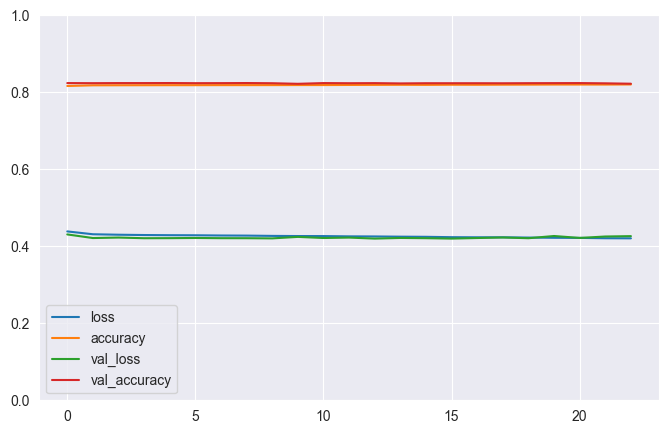

In [60]:
history = pipeline1['classifier'].model.history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
keras.backend.clear_session()

model2 = Sequential()
model2.add(Dense(120, activation="sigmoid",  input_shape=(43,)))
model2.add(BatchNormalization())
model2.add(Activation("sigmoid"))
model2.add(Dropout(0.2))
model2.add(Dense(50, activation="relu"))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dropout(0.2))
model2.add(Dense(35, activation="relu"))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation="relu"))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation="sigmoid"))
model2.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

pipeline2 = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', KerasClassifier(model=model2, epochs=100, batch_size=32, verbose=1, callbacks = [EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)]))
])

pipeline2.fit(X_train, y_train, classifier__validation_split=0.1)

Epoch 1/100
2250/2250 [==============================] - 7s 2ms/step - loss: 0.5147 - accuracy: 0.7793 - val_loss: 0.4351 - val_accuracy: 0.8235
Epoch 2/100
2250/2250 [==============================] - 5s 2ms/step - loss: 0.4558 - accuracy: 0.8113 - val_loss: 0.4275 - val_accuracy: 0.8235
Epoch 3/100
2250/2250 [==============================] - 5s 2ms/step - loss: 0.4475 - accuracy: 0.8143 - val_loss: 0.4233 - val_accuracy: 0.8239
Epoch 4/100
2250/2250 [==============================] - 5s 2ms/step - loss: 0.4441 - accuracy: 0.8160 - val_loss: 0.4254 - val_accuracy: 0.8239
Epoch 5/100
2250/2250 [==============================] - 5s 2ms/step - loss: 0.4424 - accuracy: 0.8162 - val_loss: 0.4223 - val_accuracy: 0.8239
Epoch 6/100
2250/2250 [==============================] - 5s 2ms/step - loss: 0.4410 - accuracy: 0.8170 - val_loss: 0.4224 - val_accuracy: 0.8239
Epoch 7/100
2250/2250 [==============================] - 5s 2ms/step - loss: 0.4378 - accuracy: 0.8167 - val_loss: 0.4216 - val_ac

Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('num_pipeline',
                                                 Pipeline(steps=[('select_numeric',
                                                                  DataFrameSelector(attribute_names=['Current '
                                                                                                     'Loan '
                                                                                                     'Amount',
                                                                                                     'Credit '
                                                                                                     'Score',
                                                                                                     'Annual '
                                                                                                     'Income',
                                                                                                     'Monthly '
                                                                                                     'Debt',
                                                                                                     'Years '
                                                                                                     'of '
                                                                                                     'Credit '
                                                                                                     'History',
                                                                                                     'Number '
                                                                                                     'of '
                                                                                                     'Open '
                                                                                                     'Accounts',
                                                                                                     'Number '
                                                                                                     'of '
                                                                                                     'Credit '
                                                                                                     'Problems',
                                                                                                     'Current '
                                                                                                     'Credit '
                                                                                                     'Balance',
                                                                                                     'Maximum '
                                                                                                     'Op...
                                                                                                     'Ownership',
                                                                                                     'Purpose'])),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('cat_encoder',
                                                                  OneHotEncoder(sparse=False)),
                                                                 ('standardscaler',
                                                                  StandardScaler())]))])),
                ('classifier',
                 KerasClassifier(batch_size=32, callbacks=[<keras.callbacks.EarlyStopping object at 0x0000020A35363A00>], epochs=100, model=<keras.

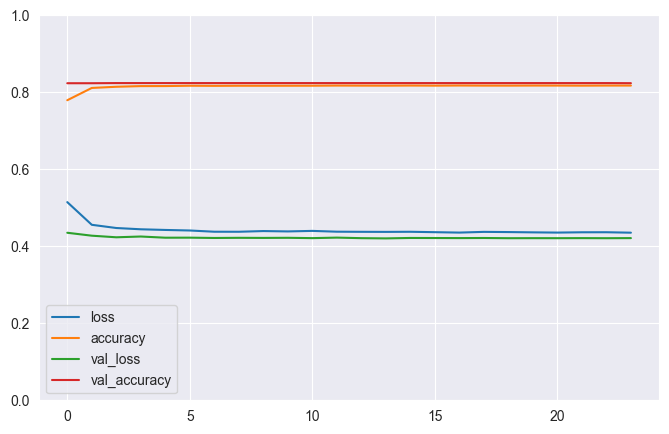

In [62]:
history2 = pipeline2['classifier'].model.history
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [63]:
#Wyniki

In [64]:
from sklearn import  metrics
from sklearn.metrics import roc_auc_score

X_train_results= preprocess_pipeline.fit_transform(X_train)
X_test_scaled = preprocess_pipeline.transform(X_test)

models = []
models.append(('LogisticRegression', grid_1.best_estimator_))
models.append(('RandomForest Classifier', grid_2.best_estimator_))
models.append(('KNN Classifier', grid_3.best_estimator_))
models.append(('SVM poly', grid_4.best_estimator_))
models.append(('SVM rbf', grid_5.best_estimator_))
models.append(('DecisionTree Classifier', grid_6.best_estimator_))
models.append(('AdaBoost Classifier', grid_7.best_estimator_))
models.append(('GradientBoosting Classifier', grid_8.best_estimator_))
models.append(('XGB Classifier', grid_9.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    print("roc_score: {}".format( roc_auc_score(y_test, model.predict(X_test))))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))
    roc_score.append(roc_auc_score(y_test, model.predict(X_test)))

neural_Networks = []
neural_Networks.append(("First Neural Network", model1))
neural_Networks.append(("Second Neural Network", model2))

for name, model in neural_Networks:
    precision_keras = keras.metrics.Precision()
    precision_keras.update_state(y_true=y_test, y_pred=(model.predict(X_test_scaled) > 0.5).astype("int32"))
    precision = precision_keras.result().numpy()
    print("precision_score: {}".format(precision))
    precision_score.append(precision)
    recall_keras = keras.metrics.Recall()
    recall_keras.update_state(y_true=y_test, y_pred=(model.predict(X_test_scaled) > 0.5).astype("int32"))
    recall = recall_keras.result().numpy()
    print("recall_score: {}".format(recall))
    recall_score.append(recall)
    f1 = (2 * precision * recall) / (precision + recall)
    print("f1_score: {}".format( f1 ))
    f1_score.append(f1)
    accuracy_keras = keras.metrics.Accuracy()
    accuracy_keras.update_state(y_true=y_test, y_pred=(model.predict(X_test_scaled) > 0.5).astype("int32"))
    accuracy = accuracy_keras.result().numpy()
    print("accuracy_score: {}".format( accuracy))
    accuracy_score.append(accuracy)
    accuracy_keras = keras.metrics.AUC()
    accuracy_keras.update_state(y_true=y_test, y_pred=(model.predict(X_test_scaled) > 0.5).astype("int32"))
    roc = accuracy_keras.result().numpy()
    print("roc_score: {}".format( roc ))
    roc_score.append(roc)

LogisticRegression
precision_score: 0.8114474581606421
recall_score: 0.999870709160256
f1_score: 0.8958586736171446
accuracy_score: 0.8202
roc_score: 0.6033341627902361
RandomForest Classifier
precision_score: 0.8123586642124638
recall_score: 0.998577800762816
f1_score: 0.8958937478250782
accuracy_score: 0.8205
roc_score: 0.6055568324052438
KNN Classifier
precision_score: 0.809197446897562
recall_score: 0.999870709160256
f1_score: 0.8944857299829395
accuracy_score: 0.81755
roc_score: 0.5974855642468682
SVM poly
precision_score: 0.7734886744337217
recall_score: 1.0
f1_score: 0.8722792376226458
accuracy_score: 0.7735
roc_score: 0.5001103509159126
SVM rbf
precision_score: 0.7742116829355548
recall_score: 0.9793134656409593
f1_score: 0.8647676675419569
accuracy_score: 0.7631
roc_score: 0.5021263863186037
DecisionTree Classifier
precision_score: 0.8112970052971102
recall_score: 1.0
f1_score: 0.8958188556868196
accuracy_score: 0.8201
roc_score: 0.6029574045464577
AdaBoost Classifier
precisio

In [65]:
import pandas as pd
d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc score': roc_score
    }

df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=["LogisticRegression", "RandomForest", "KNN", "SVM poly", "SVM rbf", "DecisionTree", "AdaBoost", "GradientBoosting", "XGB", "First Neural Network", "Second Neural Network"])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc score
0,LogisticRegression,0.811447,0.999871,0.895859,0.82020,0.603334
1,RandomForest,0.812359,0.998578,0.895894,0.82050,0.605557
2,KNN,0.809197,0.999871,0.894486,0.81755,0.597486
3,SVM poly,0.773489,1.000000,0.872279,0.77350,0.500110
4,SVM rbf,0.774212,0.979313,0.864768,0.76310,0.502126
5,DecisionTree,0.811297,1.000000,0.895819,0.82010,0.602957
6,AdaBoost,0.812125,0.998449,0.895700,0.82015,0.604940
7,GradientBoosting,0.813308,0.996380,0.895584,0.82030,0.607768
8,XGB,0.813146,0.997285,0.895851,0.82065,0.607448
9,First Neural Network,0.812685,0.994828,0.894579,0.81865,0.605999


In [66]:
#Wykresy wyników

<Axes: title={'center': 'Precision scores'}, xlabel='Method', ylabel='precision_score'>

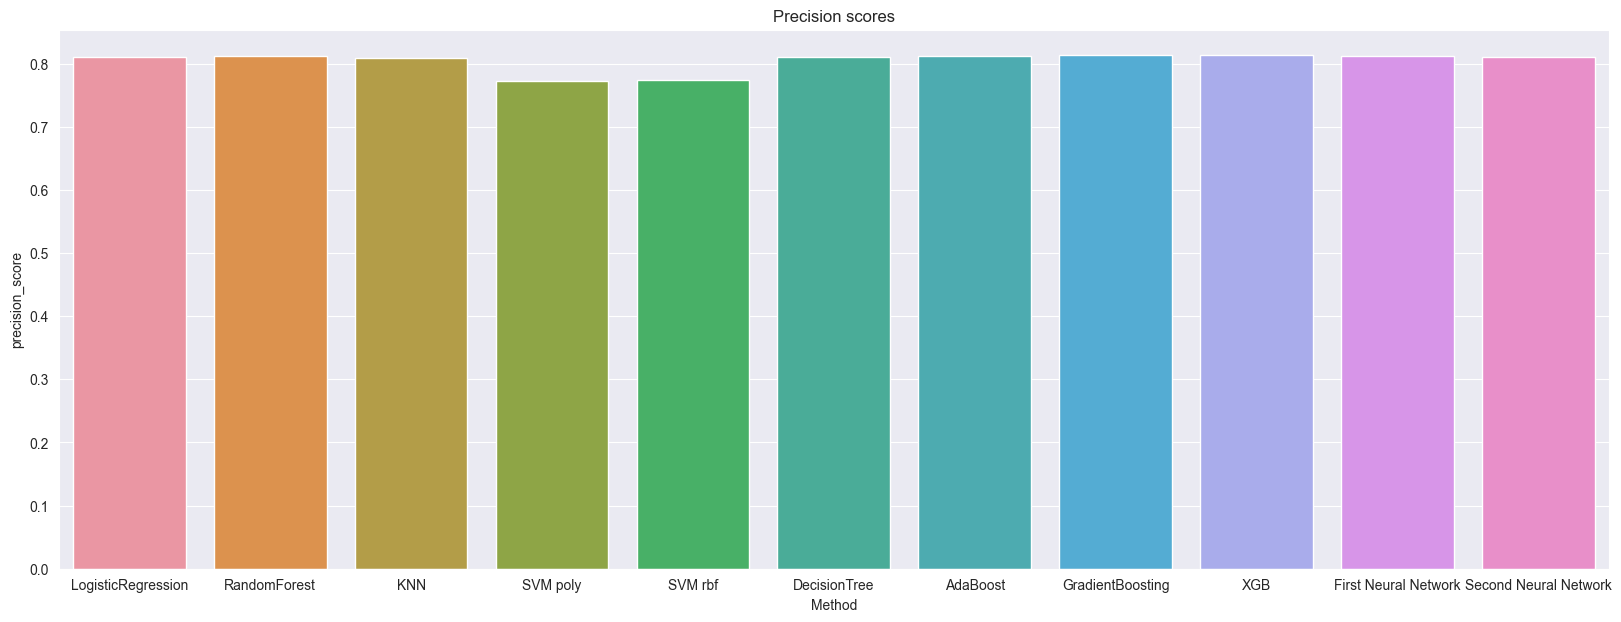

In [69]:
plt.figure(figsize=(20,7))
plt.title('Precision scores')
sns.barplot(data=df, y='precision_score', x='Method')

<Axes: title={'center': 'Recall scores'}, xlabel='Method', ylabel='recall_score'>

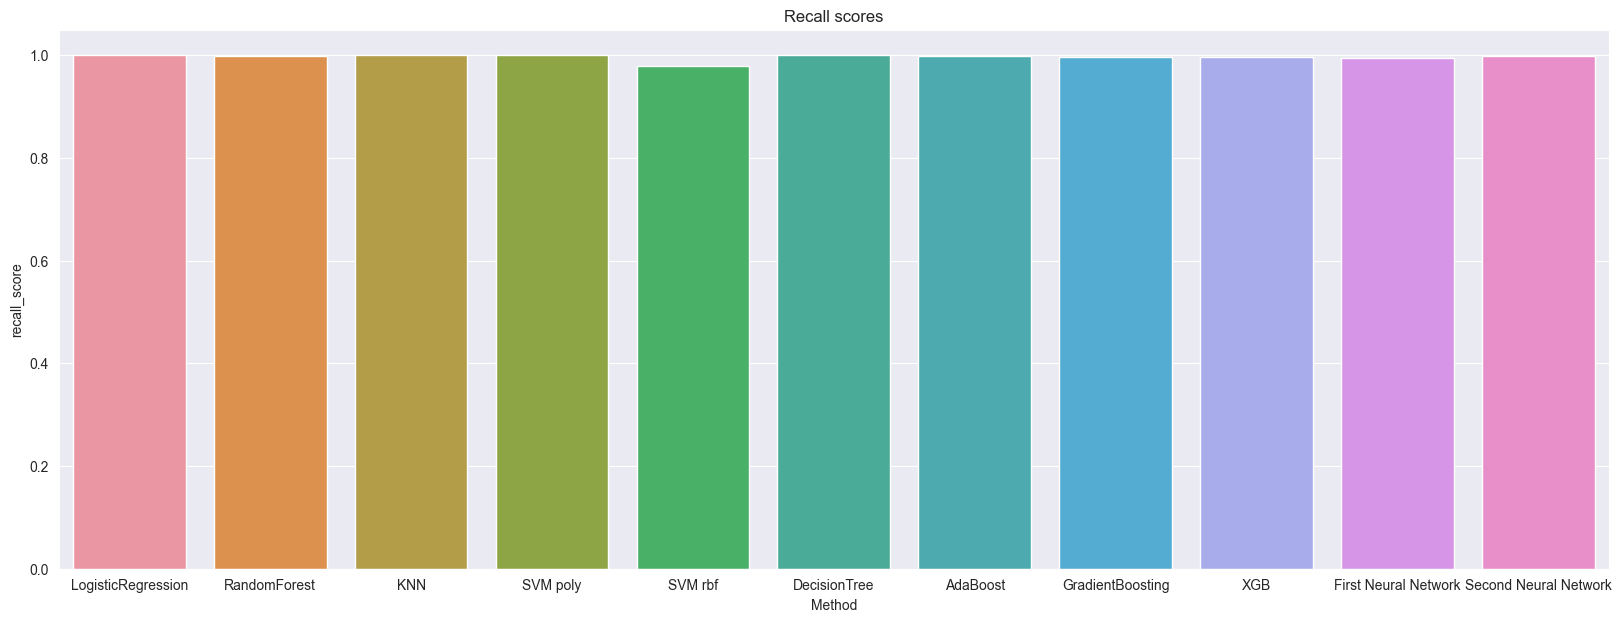

In [70]:
plt.figure(figsize=(20,7))
plt.title('Recall scores')
sns.barplot(data=df, y='recall_score', x='Method')

<Axes: title={'center': 'F1 scores'}, xlabel='Method', ylabel='f1_score'>

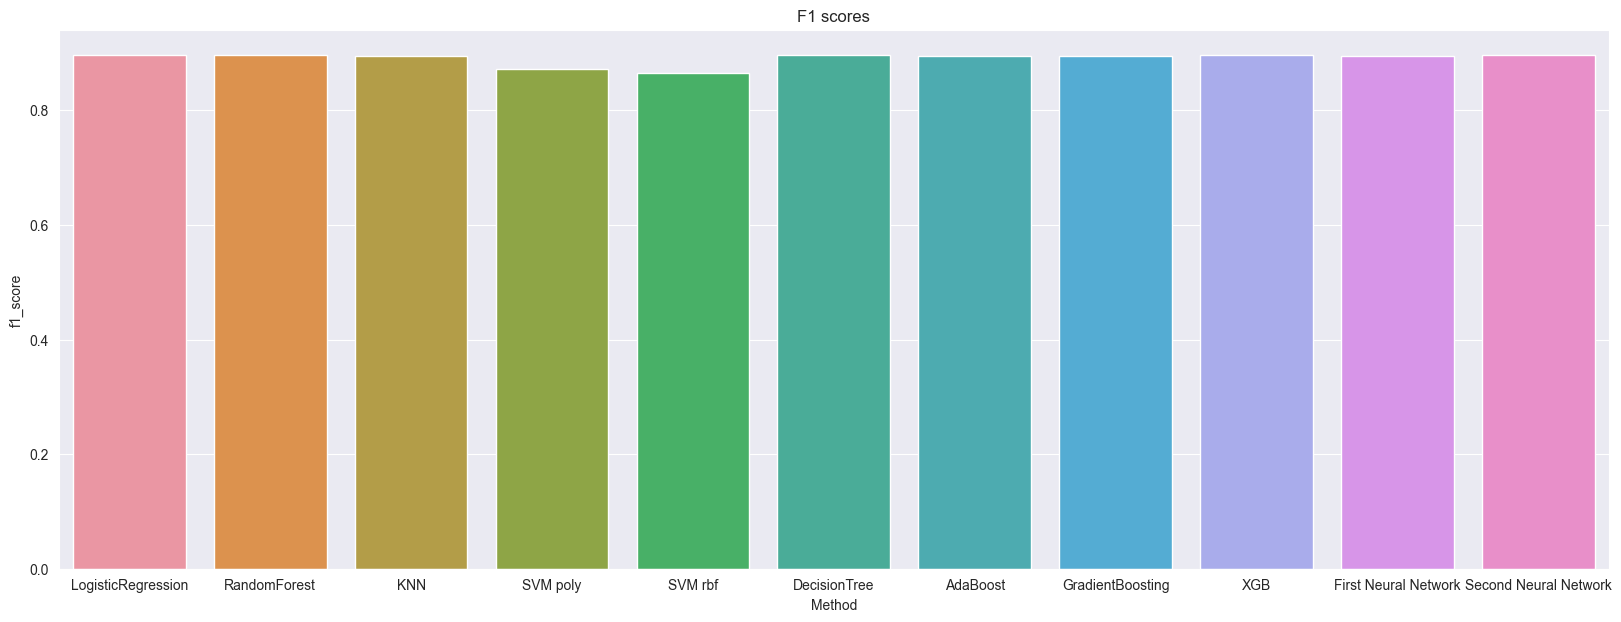

In [71]:
plt.figure(figsize=(20,7))
plt.title('F1 scores')
sns.barplot(data=df, y='f1_score', x='Method')

<Axes: title={'center': 'Accuracy scores'}, xlabel='Method', ylabel='accuracy_score'>

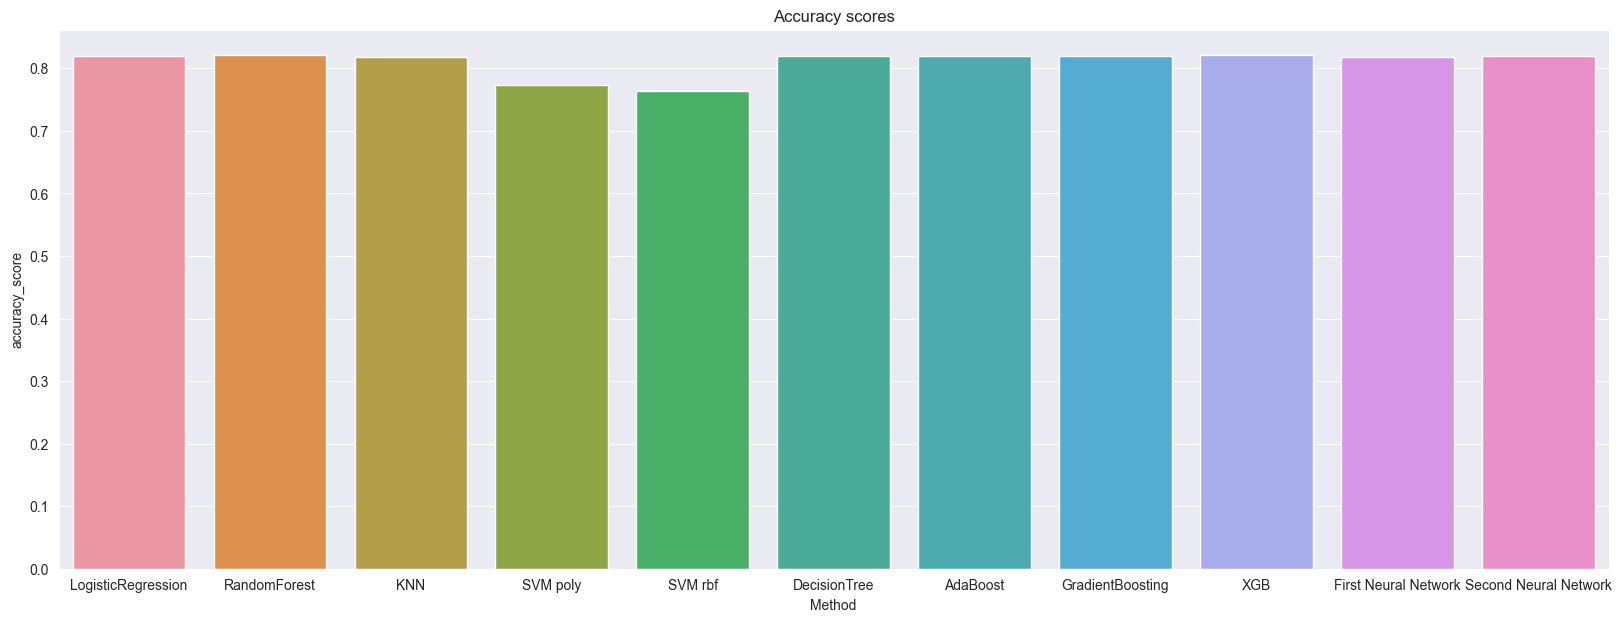

In [72]:
plt.figure(figsize=(20,7))
plt.title('Accuracy scores')
sns.barplot(data=df, y='accuracy_score', x='Method')

<Axes: title={'center': 'Roc auc scores'}, xlabel='Method', ylabel='roc score'>

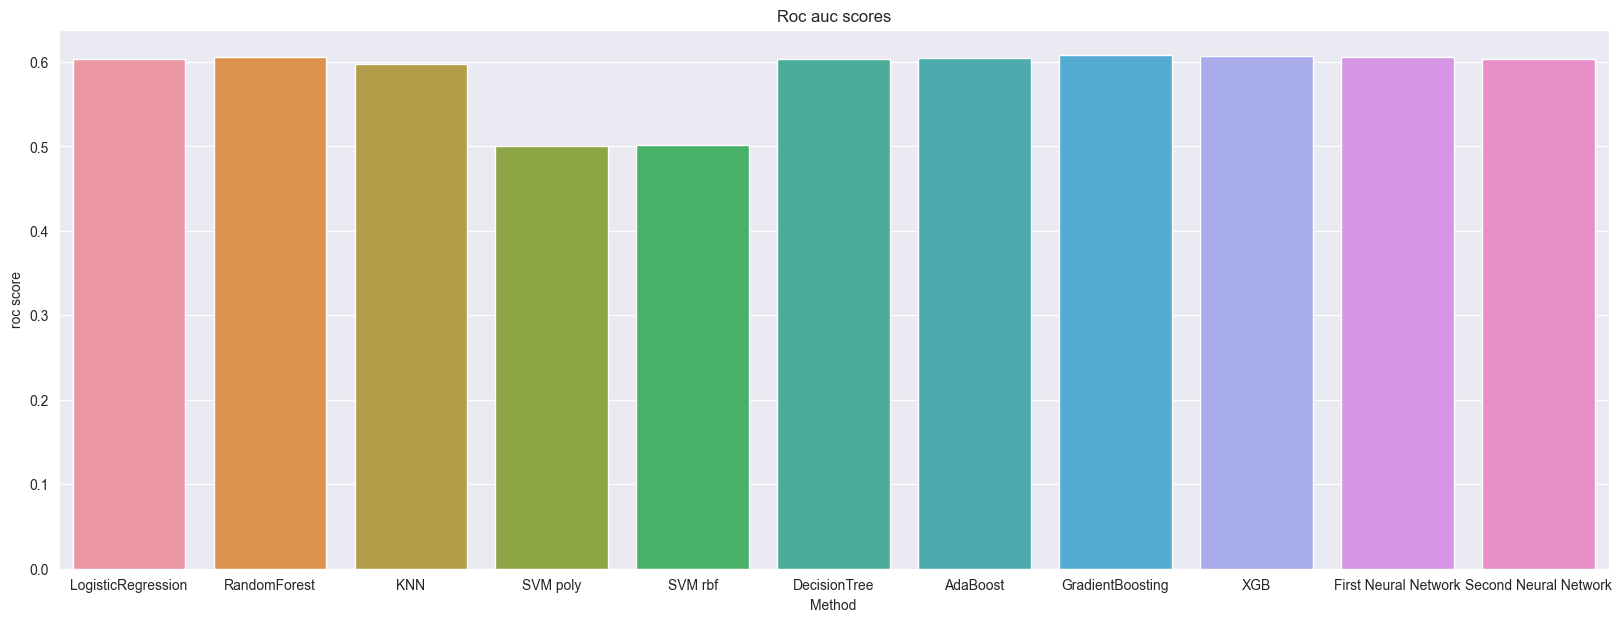

In [75]:
plt.figure(figsize=(20,7))
plt.title('Roc auc scores')
sns.barplot(data=df, y='roc score', x='Method')

In [ ]:
#Podsumowanie wyników

In [ ]:
#Prawie wszystkie modele uzyskały wyniki na tym samym poziomie(poza SVM), accuracy w okolicach 0,82.